# Solution {-}

Kalman Filter (KF) vs Information Filter (IF)

P1: 0.053
P2: 0.027


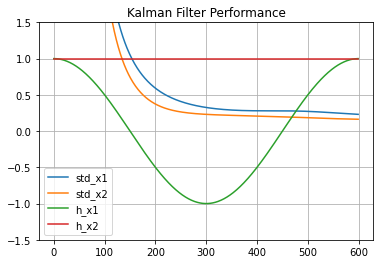

In [1]:
from numpy import array, arange, cos, pi, sqrt, eye
from numpy.linalg import inv
import matplotlib.pyplot as plt

# Kalman Filter

# System parameters
samples = 600   # Number of samples

# Transition matrix
phi = array([[1, 0],
             [0, 1]])

# Process noise covariance matrix
Q = array([[1e2, 0],
           [0, 0]])

# Inital covariance matrix
P = array([[1e6, 0],
           [0, 1e6]])

# Measurement covariance matrix
R = array([[4**2]])

# Time update
P = phi@P@phi.T + Q

# Plot vectors
P_all = []; H_all =[]

# Main loop
for k in range(0, samples):
    
    # Design matrix
    H = array([[cos(2*pi*k/600), 1]])
    
    # Kalman gain
    K = P@H.T@inv(H@P@H.T + R)
    
    # Measurement covariance update
    P = (eye(2) - K@H)@P
    
    # Accumulate plot vectors
    P_all.append(P)
    H_all.append(H)
    
# Extract plot vectors
P1 = [P[0, 0] for P in P_all];
P2 = [P[1, 1] for P in P_all];

H1 = [H[0, 0] for H in H_all]
H2 = [H[0, 1] for H in H_all]

print("P1: %.3f" % P1[samples - 1])
print("P2: %.3f" % P2[samples - 1])

# Plot results
plt.title('Kalman Filter Performance')
plt.plot(sqrt(P1), label="std_x1")
plt.plot(sqrt(P2), label="std_x2")
plt.plot(H1, label="h_x1")
plt.plot(H2, label="h_x2")
plt.ylim([-1.5, 1.5])
plt.legend()
plt.grid()
plt.show()

P1: 0.053
P2: 0.027


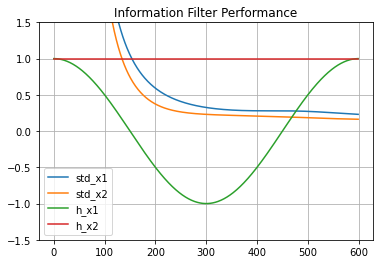

In [2]:
# Information Filter

# Transition matrix
phi = array([[1, 0],
             [0, 1]])
phi_inv = inv(phi)

# Process noise covariance matrix
Q = array([[1e2, 0],
           [0, 1e-9]])  # Cannot be 0
Q_inv = inv(Q)

# Inital covariance matrix
P = array([[1e6, 0],
           [0, 1e6]])
P_inv = inv(P)

# Measurement covariance matrix
R = array([[4**2]])
R_inv = inv(R)

# Time update
M = phi_inv.T@P_inv@phi_inv
P_inv = M - M@inv(M + Q_inv)@M.T

# Plot vectors
P_all = []; H_all =[]

# Main loop
for k in range(0, samples):
    
    # Design matrix
    H = array([[cos(2*pi*k/600), 1]])
    
    # Measurement covariance update
    P_inv = P_inv + H.T@R_inv@H
    P = inv(P_inv)
    
    # Accumulate plot vectors
    P_all.append(P)
    H_all.append(H)
    
# Extract plot vectors
P1 = [P[0, 0] for P in P_all];
P2 = [P[1, 1] for P in P_all];

H1 = [H[0, 0] for H in H_all]
H2 = [H[0, 1] for H in H_all]

print("P1: %.3f" % P1[samples - 1])
print("P2: %.3f" % P2[samples - 1])

# Plot results
plt.title('Information Filter Performance')
plt.plot(sqrt(P1), label="std_x1")
plt.plot(sqrt(P2), label="std_x2")
plt.plot(H1, label="h_x1")
plt.plot(H2, label="h_x2")
plt.ylim([-1.5, 1.5])
plt.legend()
plt.grid()
plt.show()